# Compute performance metrics for the given Y and Y_score without sklearn

In [113]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'


In [114]:
data=pd.read_csv('5_a.csv')
data.shape

(10100, 2)

In [115]:
data.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [116]:
data['y'].value_counts()
#data[data['y']==1].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [117]:
#data[data['y']=='']
data.isnull().any()
#data.notnull().sum()

y        False
proba    False
dtype: bool

<b>Observation:</b>
 There are no null data's

In [118]:
#data['y_pred']=map(lambda x: 0 if x<0.5 else 1, data['proba'])
fun=lambda x: 0 if x < 0.5 else 1
data['y_pred']=data['proba'].map(fun)                #https://sparkbyexamples.com/pandas/pandas-map-function-explained/
data.head() 

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [119]:
data[data['proba']<=0.5]

,y,proba,y_pred


<b>Observation:</b>
 There are no 'proba' values less than 0.5 , means y_pred = 1 in allrows.

In [120]:
TN= data['y'][(data.y==0) & (data.y_pred==0)].count()
print(TN)
FN=data['y'][(data.y==1) & (data.y_pred==0)].count()
print(FN)
FP=data['y'][(data.y==0) & (data.y_pred==1)].count()
print(FP)
TP=data['y'][(data.y==1) & (data.y_pred==1)].count()
print(TP,'\n')

confusion_matrix=[]
confusion_matrix.append(TN)
confusion_matrix.append(FN)
confusion_matrix.append(FP)
confusion_matrix.append(TP)

M = np.reshape(confusion_matrix, (2, 2))
print("Confusion Matrix: ")
print(M)

0
0
100
10000 

Confusion Matrix: 
[[    0     0]
 [  100 10000]]


In [121]:
# Compute F1-Score
precision= TP / (TP+FN)
print("precision:",precision)
recall = TP / (TP+FP)
print("recall:",recall)

F1_Score = 2 * precision * recall / (precision + recall) 
print("\nF1_Score is :",F1_Score)

precision: 1.0
recall: 0.9900990099009901

F1_Score is : 0.9950248756218906


In [122]:
# Compute Accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("Accuracy is : ", accuracy)

Accuracy is :  0.9900990099009901


In [123]:
# Compute AUC score
data=data.sort_values(by=['proba'], ascending=False)     #note:retains the index position
prob_score=data['proba'].unique()
tpr_list=[]
fpr_list=[]

def calc(threshold):                           #calculating  'y_pred' value for every threshold vaue.
    data.drop('y_pred',axis=1)
    fun=lambda x: 0 if x < threshold else 1
    data['y_pred']=data['proba'].map(fun)
    return data['y_pred']

def tprfpr(data):    
    TN= data['y'][(data.y==0) & (data.y_pred==0)].count()
    FN=data['y'][(data.y==1) & (data.y_pred==0)].count()
    FP=data['y'][(data.y==0) & (data.y_pred==1)].count()
    TP=data['y'][(data.y==1) & (data.y_pred==1)].count()
    
    TPR= TP/(TP+FN)
    FPR=FP/(FP+TN)
    return TPR,FPR

In [124]:
for threshold in prob_score:
    data['y_pred']=calc(threshold)
    TPR,FPR=tprfpr(data)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
print(tpr_list[:10])
print(fpr_list[:10])



[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [125]:
print(fpr_list[-10:-1])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [126]:
print(len(tpr_list))
print(len(prob_score))

10100
10100


In [127]:
auc_score = np.trapz(tpr_list, fpr_list)    #source:https://stackoverflow.com/a/39678975/4084039 
auc_score

0.48829900000000004

<b><i>auc_score above is less than 0.5 , so the model is performing less than random model(imaginary).

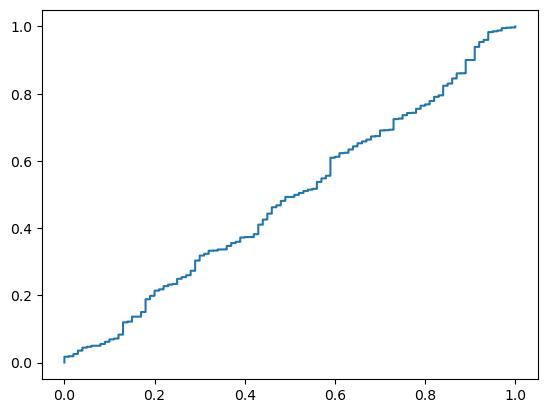

In [128]:
#I have imported matplotlib just to plot the graph
from matplotlib import pyplot as plt
plt.plot(fpr_list,tpr_list)



## B. Compute performance metrics for the given data '5_b.csv'


In [129]:
data2=pd.read_csv('5_b.csv')
data2.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [130]:
data2.shape

(10100, 2)

In [131]:
data2.isnull().any()

y        False
proba    False
dtype: bool

In [132]:
data2['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [133]:
fun=lambda x: 0 if x < 0.5 else 1
data2['y_pred']=data2['proba'].map(fun)                #https://sparkbyexamples.com/pandas/pandas-map-function-explained/
data2.head() 

,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [134]:
data2[data2['proba']>=0.5].count()

y         294
proba     294
y_pred    294
dtype: int64

In [135]:
data2[data2['proba']<=0.5].count()

y         9806
proba     9806
y_pred    9806
dtype: int64

In [136]:
TN= data2['y'][(data2.y==0) & (data2.y_pred==0)].count()
print(TN)
FN=data2['y'][(data2.y==1) & (data2.y_pred==0)].count()
print(FN)
FP=data2['y'][(data2.y==0) & (data2.y_pred==1)].count()
print(FP)
TP=data2['y'][(data2.y==1) & (data2.y_pred==1)].count()
print(TP,'\n')

confusion_matrix=[]
confusion_matrix.append(TN)
confusion_matrix.append(FN)
confusion_matrix.append(FP)
confusion_matrix.append(TP)

M = np.reshape(confusion_matrix, (2, 2))
print("Confusion Matrix: ")
print(M)

9761
45
239
55 

Confusion Matrix: 
[[9761   45]
 [ 239   55]]


In [137]:
# Compute F1-Score
precision= TP / (TP+FN)
print("precision:",precision)
recall = TP / (TP+FP)
print("recall:",recall)

F1_Score = 2 * precision * recall / (precision + recall) 
print("\nF1_Score is :",F1_Score)

precision: 0.55
recall: 0.1870748299319728

F1_Score is : 0.2791878172588833


In [138]:
# Compute Accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("Accuracy is : ", accuracy)

Accuracy is :  0.9718811881188119


In [139]:
# Compute AUC score
data2=data2.sort_values(by=['proba'], ascending=False)     #note:retains the index position
prob_score=data2['proba'].unique()
tpr_list=[]
fpr_list=[]

def calc(threshold):                           #calculating  'y_pred' value for every threshold vaue.
    data2.drop('y_pred',axis=1)
    fun=lambda x: 0 if x < threshold else 1
    data2['y_pred']=data2['proba'].map(fun)
    return data2['y_pred']

def tprfpr(data2):    
    TN= data2['y'][(data2.y==0) & (data2.y_pred==0)].count()
    FN=data2['y'][(data2.y==1) & (data2.y_pred==0)].count()
    FP=data2['y'][(data2.y==0) & (data2.y_pred==1)].count()
    TP=data2['y'][(data2.y==1) & (data2.y_pred==1)].count()
    
    TPR= TP/(TP+FN)
    FPR=FP/(FP+TN)
    return TPR,FPR

In [140]:
for threshold in prob_score:
    data2['y_pred']=calc(threshold)
    TPR,FPR=tprfpr(data2)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
print(tpr_list[:10])
print(fpr_list[:10])



[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [141]:
print(len(tpr_list))
print(len(prob_score))

10100
10100


In [142]:
auc_score = np.trapz(tpr_list, fpr_list)    #source:https://stackoverflow.com/a/39678975/4084039 
auc_score

0.9377570000000001

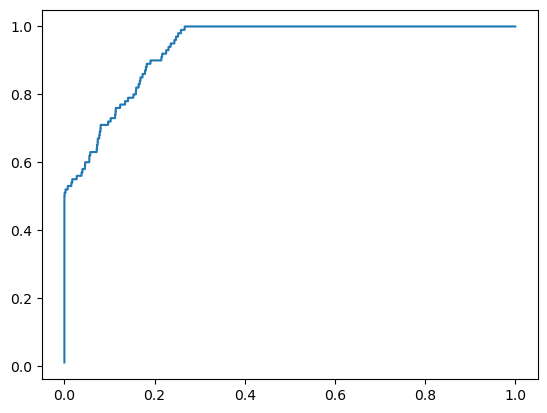

In [143]:
#I have imported matplotlib just to plot the graph
from matplotlib import pyplot as plt
plt.plot(fpr_list,tpr_list)

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

we will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data we can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [144]:
data3=pd.read_csv('5_c.csv')
data3.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [145]:
data3['y'].value_counts()


0    1805
1    1047
Name: y, dtype: int64

In [146]:
data3.isnull().any()

y       False
prob    False
dtype: bool

In [147]:
fun=lambda x: 0 if x < 0.5 else 1
data3['y_pred']=data3['prob'].map(fun)                #https://sparkbyexamples.com/pandas/pandas-map-function-explained/
data3.head() 

,y,prob,y_pred
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [148]:
data3[data3['prob']>=0.5].count(),data3[data3['prob']<=0.5].count()

(y         753
 prob      753
 y_pred    753
 dtype: int64,
 y         2099
 prob      2099
 y_pred    2099
 dtype: int64)

In [149]:
# Compute AUC score
data3=data3.sort_values(by=['prob'], ascending=False)     #note:retains the index position
prob_score=data3['prob'].unique()
tpr_list=[]
fpr_list=[]
A=[]

def calc(threshold):                           #calculating  'y_pred' value for every threshold vaue.
    data3.drop('y_pred',axis=1)
    fun=lambda x: 0 if x < threshold else 1
    data3['y_pred']=data3['prob'].map(fun)
    return data3['y_pred']

def tprfpr(data3):    
    TN= data3['y'][(data3.y==0) & (data3.y_pred==0)].count()
    FN=data3['y'][(data3.y==1) & (data3.y_pred==0)].count()
    FP=data3['y'][(data3.y==0) & (data3.y_pred==1)].count()
    TP=data3['y'][(data3.y==1) & (data3.y_pred==1)].count()
    
    TPR= TP/(TP+FN)
    FPR=FP/(FP+TN)
    return TPR,FPR,FN,FP

In [150]:
for threshold in prob_score:
    data2['y_pred']=calc(threshold)
    TPR,FPR,FN,FP=tprfpr(data3)
    a=(500*FN)+(100*FP)
    A.append(a)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
print(tpr_list[:10])
print(fpr_list[:10])

[0.0009551098376313276, 0.0019102196752626551, 0.0028653295128939827, 0.0038204393505253103, 0.004775549188156638, 0.0057306590257879654, 0.0066857688634192934, 0.007640878701050621, 0.008595988538681949, 0.009551098376313277]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [151]:
m=A.index(min(A))
m
len(prob_score)
t=prob_score[m]
print(t)
print("the minimum value is : {} and threshold value is : {}".format(min(A),t))

0.2300390278970873
the minimum value is : 141000 and threshold value is : 0.2300390278970873


In [152]:
type(prob_score)

numpy.ndarray


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [153]:
data4=pd.read_csv('5_d.csv')
data4.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [154]:
data4 = np.loadtxt('5_d.csv', delimiter=',', skiprows=1)
print(data4[:5,:5])
y = data4[:, 0]
y_pred = data4[:, 1]
len(y), len(y_pred)

[[101. 100.]
 [120. 100.]
 [131. 113.]
 [164. 125.]
 [154. 152.]]


(157200, 157200)

In [155]:
# Compute Mean Square Error
MSE = np.sum(np.power(y - y_pred, 2)) / len(data4)
print("Mean Square Error: ", MSE)

Mean Square Error:  177.16569974554707


In [156]:
MAPE = np.sum(np.absolute(y - y_pred)) / np.sum(y)
print("Mean Absolute Percentage Error: ", MAPE)

Mean Absolute Percentage Error:  0.1291202994009687


In [157]:
# Compute R^2 error
y_mean = np.mean(np.absolute(y))

total_sum_of_squares = np.sum(np.power(y - y_mean, 2))

sum_squares_of_residues = np.sum(np.power(y - y_pred, 2))

coeff_of_det = 1 - (sum_squares_of_residues / total_sum_of_squares)

print("R^2 error: ", coeff_of_det)

R^2 error:  0.9563582786990937
